In [3]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
from model_zucher import zurcher
from Solve_NFXP import solve_NFXP
import estimate_NFXP as estimate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


#### Before solving the exercise, you should download line_profiler. Line_profiler is a tool to check the performance of our code. To install line_profiler, you can open anaconda prompt and write "pip install line-profiler" (without the " " of course). If you want to know more about line_profiler, check the link below:

https://github.com/rkern/line_profiler.

# Exercise 1

#### Consider the engine replacement model given by:

$$
V(x,\varepsilon) = \max_{d\in \{0,1\}} \big\{ u(x,d) + \varepsilon_d + \beta
\underbrace{\int_{X} \int_{\Omega} V(x',\varepsilon') \pi(x'|x,d) q(\varepsilon'|x') dx' d\varepsilon' }_{EV(x,d)} \big\}
$$

Where $ \varepsilon $ is extreme value Type I distribued and utility is given by:

$$
u(x,d)=\left \{
\begin{array}{ll}
    -RC-c(0,\theta_1) & \text{if }d=\text{replace}=1 \\
    -c(x,\theta_1) & \text{if }d=\text{keep}=0
\end{array} \right.
$$

Here

- $ RC $ = replacement cost  
- $ c(x,\theta_1) $ = cost of maintenance with preference parameters $ \theta_1 $  




#### 1. Look at ReadMe.txt to get an overview of the code

#### 2. Invistigate how the code works, that is ensure you understand:
<il type ="a">
<li> zurcher.init</li>
<li> zurcher.setup</li>
<li> zurcher.create_grid</li>
<li> zucher.state_transition </li>
<li> zucher.bellman </li>

You can see how they are called below
    

#### 3. Fill in the missing stuff in the function zucher.bellman and run the code below. 

In [4]:
do_settings = {
    'RC': 0.5,
    'n': 12,
    'p':[0.65,0.2,0.1]   
}
model = zurcher(**do_settings)

print('Model grid:\n',model.grid)
print('Transition probabilities conditional on not replacing:\n',model.P1)
print('Transition probabilities conditional on replacing:\n',model.P2)
ev,pk, dev = model.bellman(np.zeros((model.n)),output=3)
print('Bellman one run:\n',ev)

Model grid:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
Transition probabilities conditional on not replacing:
 [[0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.1  0.05]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.2  0.15]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.65 0.35]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]
Transition probabilities conditional on replacing:
 [[0.65 0.2  0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.65 0.2  0.1  0.05

### Newton's Method

Next, we need to solve the model. Rust 1987 uses Newton–Kantorovich (NK) theorem to solve the Bellman equation in the engine replacement model. To understand the NK algorithm, consider using the Newton's method to solve the single-variable equation, $f(x)=0$. The Newton method uses the iterative procedure stated below to solve the equation:

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

### 4. Use the Newton's Method to solve the equation below. Fill in the Newton step. Try to vary the starting value and see if the solution changes.


$$f(x) = 3x^2 - exp(x)=0$$

$$f'(x) = g(x) = 6x-exp(x) $$

Root of f(x): 3.73
Number of iterations to archieve convergence: 6


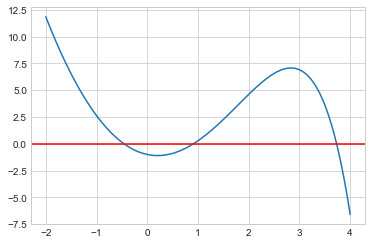

In [6]:
f = lambda x: 3*x**2-np.exp(x)
g = lambda x: 6*x-np.exp(x)

def newton(f, g, x0, tol=10e-5, max_iter=100):
    delta = 2000
    it=0
    while (max_iter>= it and tol<delta):
        # fill in
        x1 = x0-f(x0)/g(x0)
        delta = abs(x1-x0)
        it += 1
        x0 = x1
    return x1, it


x0,it = newton(f = f, g = g, x0 = 5)

x = np.linspace(-2, 4, num=100)
fx = f(x)
plt.plot(x, fx)
plt.axhline(y=0, color='r', linestyle='-')

print('Root of f(x):', round(x0,2))
print('Number of iterations to archieve convergence:', it)

### Newton-Kantorovich

Now consider solving the engine replacement model. To do so, we need to find the expected value function that solves the Bellman equation.

$$
EV(x,d) =  \Gamma(EV)(x,d) \quad\Leftrightarrow\quad (I - \Gamma)(EV)(x,d)=\mathbb{0}
$$

Similar to the Newton iteration, the **NK iteration** uses the following equation

$$
EV_{k+1} = EV_{k} - (I-\Gamma')^{-1} (I-\Gamma)(EV_k)
$$

- The new operator is the difference between the identity operator \$I\$ and Bellman operator $ \Gamma  $  
- $ \mathbb{0} $ is zero function  
- $ I-\Gamma' $ is a Fréchet derivative of the operator $ I-\Gamma $  

### 5. Solve the model. In order to solve the model, you should understand:
<li> solve_NFXP.init</li>
<li> solve_NFXP.setup</li>
<li> solve_NFXP.poly </li>
<li> solve_NFXP.sa </li>
<li> solve_NFXP.nk </li>
</il>
You can see how they are called below: 

In [7]:
algorithm = 'poly'
do_settings_solver = {
    'sa_min': 10,
    'sa_max': 20,  
    'printfxp': 2
}

solver = solve_NFXP(**do_settings_solver)
model = zurcher()

if algorithm == 'sa':
    ev = solver.sa(model.bellman)
if algorithm == 'poly':
    ev = solver.poly(model.bellman)
else:
    print('Algorithm must be "sa" or "poly"')

Begin contraction iterations (for the 1 time)
Iteration 1, tol     0.4273, tol(j)/tol(j-1)          1
Iteration 2, tol     0.4272, tol(j)/tol(j-1)     0.9999
Iteration 3, tol     0.4272, tol(j)/tol(j-1)     0.9999
Iteration 4, tol     0.4271, tol(j)/tol(j-1)     0.9999
Iteration 5, tol     0.4271, tol(j)/tol(j-1)     0.9998
Iteration 6, tol      0.427, tol(j)/tol(j-1)     0.9998
Iteration 7, tol     0.4269, tol(j)/tol(j-1)     0.9998
Iteration 8, tol     0.4268, tol(j)/tol(j-1)     0.9997
Iteration 9, tol     0.4266, tol(j)/tol(j-1)     0.9996
Iteration 10, tol     0.4264, tol(j)/tol(j-1)     0.9995
Iteration 11, tol     0.4261, tol(j)/tol(j-1)     0.9994
Iteration 12, tol     0.4258, tol(j)/tol(j-1)     0.9991
Iteration 13, tol     0.4253, tol(j)/tol(j-1)     0.9988
Iteration 14, tol     0.4246, tol(j)/tol(j-1)     0.9984
Iteration 15, tol     0.4237, tol(j)/tol(j-1)     0.9978
Iteration 16, tol     0.4224, tol(j)/tol(j-1)      0.997
Iteration 17, tol     0.4207, tol(j)/tol(j-1)      

#### 6. Now we have to estimate the model. In order to estimate the model, you should understand:
<il type ="a">
<li> zurcher.read_busdata </li>
<li> estimate_NFXP.estimate  </li>
<li> estimate_NFXP.ll  </li>
</il>

You can see how they are called below:

#### 7. Fill in the missing stuff in the function estimate_NFXP.ll, and estimate the model to check that your results are correct

In [8]:
# Set up the model
model = zurcher()

# Set-up solver
solver = solve_NFXP()

# Read the data
data = model.read_busdata(bustypes=[1,2,3,4])
samplesize = data.shape[0]

# Estimate the model
import time
t0 = time.time()
theta0 = [0,0]

# args for nfxp estimate
nfxp_model, optim_res, pnames, theta_hat, Avar, converged=estimate.estimate(model, solver,data,theta0=theta0, twostep=0)

t1 = time.time()
time = t1-t0

# Print the result
print(f'Structual estimation using busdata from Rust(1987)')
print(f'Beta        = {model.beta:.4f}')
print(f'n           = {model.n}')
print(f'Sample size = {samplesize}\n \n')

print(f'Parameters     Estimates    s.e. ') 
print(f'{pnames[0]}             {theta_hat[0]:.4f}     {np.sqrt(Avar[0,0]):.4f} ')
print(f'{pnames[1]}              {theta_hat[1]:.4f}     {np.sqrt(Avar[1,1]):.4f} \n ')
print(f'{pnames[2]}(1)           {theta_hat[2]:.4f}     {np.sqrt(Avar[2,2]):.4f}  ')
print(f'{pnames[2]}(2)           {theta_hat[3]:.4f}     {np.sqrt(Avar[3,3]):.4f}  ')
print(f'{pnames[2]}(3)           {theta_hat[4]:.4f}     {np.sqrt(Avar[4,4]):.4f}  ')
print(f'{pnames[2]}(4)           {theta_hat[5]:.4f}     {np.sqrt(Avar[5,5]):.4f}  \n')


print(f'Log-likelihood {-optim_res.fun*samplesize:.2f}') 
print(f'runtime (seconds) {time:.4f}')
print(f'The model converged: {converged}')

c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\estimate_NFXP.py:122: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Structual estimation using busdata from Rust(1987)
Beta        = 0.9999
n           = 175
Sample size = 8156
 

Parameters     Estimates    s.e. 
RC             9.8673     1.2072 
c              1.3408     0.3199 
 
p(1)           0.1069     0.0034  
p(2)           0.5154     0.0055  
p(3)           0.3621     0.0053  
p(4)           0.0143     0.0013  

Log-likelihood -8605.96
runtime (seconds) 1.1186
The model converged: True


#### 8. Try using line_profiler in python. This gives you a lot of information about the performance of your code

In [9]:
%lprun -f estimate.ll  -f estimate.estimate estimate.estimate(model, solver,data,theta0=theta0, twostep=0)

Timer unit: 1e-07 s

Total time: 1.15934 s
File: c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\estimate_NFXP.py
Function: estimate at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           def estimate(model,solver,data,theta0=[0,0],twostep=0):
    10                                               global ev
    11         1        103.0    103.0      0.0      ev = np.zeros(1) 
    12                                               
    13         1        162.0    162.0      0.0      samplesize = data.shape[0]
    14                                               
    15                                               # STEP 1: Find p 
    16         1      20182.0  20182.0      0.2      tabulate = data.dx1.value_counts()
    17         1       2744.0   2744.0      0.0      p = [tabulate[i]/sum(tabulate) for i in range(tabulate.size-1)]
    18        

In [10]:
%lprun -f solve_NFXP.nk -f solve_NFXP.poly solve_NFXP.poly(solver,model.bellman)

Timer unit: 1e-07 s

Total time: 0.0173523 s
File: c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\Solve_NFXP.py
Function: poly at line 30

Line #      Hits         Time  Per Hit   % Time  Line Contents
    30                                               def poly(self,bellman, V0=np.zeros(1), beta= 0.0, output=1):
    31                                           
    32         1         59.0     59.0      0.0          t0poly = time.time()  # set the starting time
    33                                           
    34         6        116.0     19.3      0.1          for k in range(self.max_fxpiter):
    35                                           
    36                                                       # 1. CONTRACTION ITERATIONS (S-A)
    37         5         36.0      7.2      0.0              if self.printfxp>0:
    38                                                           print(f'Begin contract

a) Now try changing the optimizer options, and turn the use of the non-numerical Hessian off . What happens?

b) Now also try it with the analytical gradient off, what happens?

In [11]:
import alternative_specifications_ex7 as a_s_ex7

model = zurcher()
solver = solve_NFXP()

#Ordinaty
print('BHHH:')
%timeit nfxp_results = a_s_ex7.estimate(model, solver,data,theta0=theta0, twostep=0,est_type=0)


# Hessian off
print('')
print('Hessian is off:')
%timeit nfxp_result = a_s_ex7.estimate(model, solver,data,theta0=theta0, twostep=0,est_type=1)


#Hessian and gradient ofF 
print('')
print('Hessian and gradient are off:')
%timeit nfxp_results = a_s_ex7.estimate(model, solver,data,theta0=theta0, twostep=0,est_type=2)


BHHH:


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 1.3334 seconds. The model converges: True
Time is 1.2058 seconds. The model converges: True
Time is 1.2467 seconds. The model converges: True
Time is 1.1699 seconds. The model converges: True
Time is 0.9654 seconds. The model converges: True
Time is 1.0073 seconds. The model converges: True
Time is 1.1609 seconds. The model converges: True
Time is 1.0193 seconds. The model converges: True
1.11 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Hessian is off:
Time is 4.5947 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 4.7942 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 4.2526 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 3.8397 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 4.7493 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 3.9484 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 4.3324 seconds. The model converges: True


c:\Users\Signe\OneDrive - University of Copenhagen\Documents\Polit10\DP\dp_ucph\2_dynamic_discrete_choice\exercises\ex_ante\alternative_specifications_ex7.py:144: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  score = ((d - (1- lik_pr))[:,None])   * ( np.vstack((-np.ones(N), dc[x-1], np.zeros((n_p,N)))).T + np.broadcast_to(dev_dtheta[0],(N,2+n_p)) - dev_dtheta[x-1] )


Time is 5.2869 seconds. The model converges: True
4.46 s ± 476 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Hessian and gradient are off:
Time is 4.2736 seconds. The model converges: True
Time is 4.0931 seconds. The model converges: True
Time is 2.9561 seconds. The model converges: True
Time is 2.8863 seconds. The model converges: True
Time is 2.7127 seconds. The model converges: True
Time is 2.7227 seconds. The model converges: True
Time is 3.1572 seconds. The model converges: True
Time is 3.2566 seconds. The model converges: True
3.11 s ± 443 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 9. Try estimate the model for different values of $\beta$. 

(a) Why can we not estimate $\beta$?

(b) When estimating with different $\beta$, do the changes in the estimates of c and/or RC make intuitively sense?

(c) Can you think of some data/variation, which could allow us to identify $\beta$?

In [ ]:
# VARY BETA: 
Nbeta = 4
beta = np.linspace(0.5,0.9999,Nbeta)
log_lik = np.nan + np.zeros((Nbeta,1))
theta_hats =  np.nan + np.zeros((Nbeta,2))

data = model.read_busdata(bustypes=[1,2,3,4])
samplesize = data.shape[0]

print(f'beta     RC     C       log_lik')
for i in range(Nbeta):
    
    # Set up the model
    do_settings = {
    'beta': beta[i]
    }
    model = zurcher(**do_settings)


    # Set-up solver
    solver = solve_NFXP()

    # Estimate the model
    theta0 = [0,0]
    nfxp_model, optim_res, pnames, theta_hat, Avar, converged=estimate.estimate(model, solver,data,theta0=theta0, twostep=0)

    
    theta_hats[i,0] = theta_hat[0]
    theta_hats[i,1] = theta_hat[1]
    log_lik[i]=-optim_res.fun*samplesize
    print(f'{beta[i]:.4f} {theta_hats[i,0]:.4f} {theta_hats[i,1]:.4f} {log_lik[i]} ')



#### 10. We use the latest EV guess to start the solve-procedure even though we change $\theta$ from one likelihood iteration to another. Why do you think we do that? 
(a) What if we started over with EV=0 each iteration? Try that and see what happens with the parameters and the numerical performance.

In [ ]:
import alternative_specifications_ex9 as a_s_ex9 

# Ordinary
print('Same EV')
%timeit a_s_ex9.estimate(model, solver,data,0)
nfxp_results_ord, theta_hat_ord = a_s_ex9.estimate(model, solver,data,0)


# Change EV=0 in each iteration
print('EV=0')
%timeit a_s_ex9.estimate(model, solver,data,1)
nfxp_results_diff, theta_hat_diff = a_s_ex9.estimate(model, solver,data,1)

print('')
print(f'                 Same EV       EV=0')
print(f'{pnames[0]}               {theta_hat_ord[0]:.4f}       {theta_hat_diff[0]:.4f}')
print(f'{pnames[1]}                {theta_hat_ord[1]:.4f}       {theta_hat_diff[1]:.4f}')

#### 11. Try setting the maximum number of miles (odometer reading) to 900. Now the absorbing state is much higher. 

(a) If we adjust the number of grid points as well, so that we have a comparable model (multiply the number of grids by 2), do we get a better fit? 

(b) Try to lower the number of grid points to 175 again. How do the parameters change? Are the changes intuitive? 

(c) What if you change the max to 225 and half the number of grids (hint: what goes wrong?)?

In [ ]:
# Function for adjusting Grid-points
def adjust_grid_point(maks, n):
    # Set up the model
    do_settings = {
    'max': maks,
    'n': n
    }
    model = zurcher(**do_settings)

    # Set-up solver
    solver = solve_NFXP()
        
    # Read the data
    data = model.read_busdata(bustypes=[1,2,3,4])
    samplesize = data.shape[0]

    # Estimate the model
    theta0 = [0,0]
    
    nfxp_model, result, pnames, theta, Avar, converged=estimate.estimate(model, solver,data,theta0=theta0, twostep=0)

    
    print(f'Parameters     Estimates    s.e. ') 
    print(f'{pnames[0]}             {theta[0]:.4f}     {np.sqrt(Avar[0,0]):.4f} ')
    print(f'{pnames[1]}              {theta[1]:.4f}     {np.sqrt(Avar[1,1]):.4f} \n ')
    print(f'Log-likelihood now {-result.fun*samplesize:.4f}\n \n') 


In [ ]:
# Baseline max = 450, n = 175
print(f'Baseline')
adjust_grid_point(450,175);

# a)  max = 900, n = 175*2
print(f'Question (a)')
adjust_grid_point(450*2,175*2)

# b) max = 600, n = 175
print(f'Question (b)')
adjust_grid_point(600,175)

# c) max =225, n = 175/2
print(f'Question (c)')
adjust_grid_point(int(450/2),int(175/2));